In [1]:
import numpy as np
import pandas as pd 
import openml 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score




In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target


In [3]:
X




,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
from sklearn.model_selection import train_test_split


X_subset = X[:10000]
y_subset = y[:10000]


X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42, stratify=y_subset)


print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 8000
Test set size: 2000


## 1)

In [6]:


unique, counts = np.unique(y_train, return_counts=True)
label_counts = dict(zip(unique, counts))
print( label_counts)




{'0': 801, '1': 902, '2': 793, '3': 826, '4': 784, '5': 690, '6': 811, '7': 856, '8': 755, '9': 782}


## 2)

In [ ]:
# Function to plot an image
def plot_image(image, label):

    # Reshape the 784-length array into a 28x28 matrix
    image_reshaped = np.array(image).reshape(28, 28)
    
    # Plot the image
    plt.imshow(image_reshaped, cmap='gray')  # Display in grayscale
    plt.title(f"Label: {label}")             # Add the label as the title
    plt.axis('off')                          # Remove axis for better clarity
    plt.show()

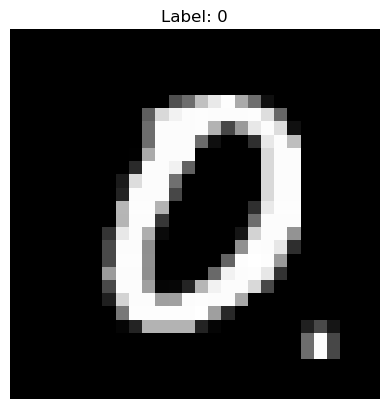

In [19]:

sample_index = 0  
plot_image(X_train.iloc[sample_index], y_train.iloc[sample_index])


## 3,4,5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [10]:
linear_svm = SVC(kernel='linear', C=1)  
linear_svm.fit(X_train, y_train) 


SVC(C=1, kernel='linear')

In [11]:
y_pred = linear_svm.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Linear SVM Model Accuracy: {accuracy:.4f}")

Linear SVM Model Accuracy: 0.9120


In [15]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10, 100],  
}


grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=None, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score (based on training set):", grid_search.best_score_)


Best Parameters: {'C': 0.1}
Best Score (based on training set): 0.915375


In [14]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Linear SVM Model Accuracy on Test Set: {accuracy:.4f}")

Best Linear SVM Model Accuracy on Test Set: 0.9120


best parameter according to the grid search are C = 0.1 and gamma = 1 for the linear kernel (i had to delete the gamma values from param_grid for speed)

In [16]:

rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')  


rbf_svm.fit(X_train, y_train)


SVC(C=1)

In [17]:

y_pred = rbf_svm.predict(X_test)


In [19]:

accuracy = accuracy_score(y_test, y_pred)
print(f"RBF SVM Model Accuracy: {accuracy:.4f}")


RBF SVM Model Accuracy: 0.9530


In [20]:
param_grid = {
    'C': [0.1, 1, 10],         
    'gamma': [0.01, 0.1, 1]    
}


In [21]:
rbf_svm = SVC(kernel='rbf')
grid_search = GridSearchCV(rbf_svm, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
             verbose=1)

best params are C = 0.1 and gamma = 0.01


In [22]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 0.01}
Best Cross-Validation Score: 0.11275001915083195


In [10]:
param_grid_poly = {
    'C': [1, 10],        # Regularization parameter
    'gamma': [ 0.1, 1],  # Coefficient for kernel function
    'degree': [2]             # Degree fixed at 2
}


In [16]:
poly_svm = SVC(kernel='poly')
grid_search_poly = GridSearchCV(poly_svm, param_grid_poly, cv=None)
grid_search_poly.fit(X_train, y_train)


GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 10], 'degree': [2], 'gamma': [0.1, 1]})

In [17]:

best_params = grid_search_poly.best_params_


best_poly_svm = SVC(
    kernel='poly',
    C=best_params['C'],
    gamma=best_params['gamma'],
    degree=best_params['degree']
)


best_poly_svm.fit(X_train, y_train)


y_pred = best_poly_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Parameters: {accuracy:.4f}")


Test Accuracy with Best Parameters: 0.9585


In [14]:
from sklearn.metrics import classification_report, accuracy_score


best_poly_svm = grid_search_poly.best_estimator_


y_pred = best_poly_svm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9585

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.97      1.00      0.98       225
           2       0.94      0.97      0.96       198
           3       0.95      0.93      0.94       206
           4       0.96      0.93      0.95       196
           5       0.95      0.95      0.95       173
           6       0.98      0.98      0.98       203
           7       0.95      0.97      0.96       214
           8       0.97      0.93      0.95       189
           9       0.94      0.93      0.94       196

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


log_reg = LogisticRegression(max_iter=500)  
log_reg.fit(X_train, y_train)


y_pred_logreg = log_reg.predict(X_test)


accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Test Accuracy (Logistic Regression): {accuracy_logreg:.4f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

y_pred_best_svm = best_poly_svm.predict(X_test)
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)

print("\nComparison of Logistic Regression and Best SVM:")
print(f"Accuracy (Logistic Regression): {accuracy_logreg:.4f}")
print(f"Accuracy (Best SVM - Polynomial Kernel): {accuracy_best_svm:.4f}")



Test Accuracy (Logistic Regression): 0.8635

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       200
           1       0.93      0.96      0.94       225
           2       0.82      0.78      0.80       198
           3       0.81      0.81      0.81       206
           4       0.89      0.85      0.87       196
           5       0.86      0.80      0.83       173
           6       0.91      0.95      0.93       203
           7       0.88      0.87      0.88       214
           8       0.73      0.78      0.76       189
           9       0.84      0.85      0.84       196

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


Comparison of Logistic Regression and Best SVM:
Accuracy (Logistic Regression): 0.8635
Accuracy (Best SVM - Polynomial Kernel): 0.9585
